In [288]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [289]:
train = pd.read_csv('train.csv')

In [290]:
train.head

<bound method NDFrame.head of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
5        6          50       RL         85.0    14115   Pave   NaN      IR1   
6        7          20       RL         75.0    10084   Pave   NaN      Reg   
7        8          60       RL          NaN    10382   Pave   NaN      IR1   
8        9          50       RM         51.0     6120   Pave   NaN      Reg   
9       10         190       RL         50.0     7420   Pave   NaN      Reg   
10      11          20       RL         70.0    11200   Pave   NaN      Reg   
11      12          60

In [291]:
train.describe

<bound method NDFrame.describe of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
5        6          50       RL         85.0    14115   Pave   NaN      IR1   
6        7          20       RL         75.0    10084   Pave   NaN      Reg   
7        8          60       RL          NaN    10382   Pave   NaN      IR1   
8        9          50       RM         51.0     6120   Pave   NaN      Reg   
9       10         190       RL         50.0     7420   Pave   NaN      Reg   
10      11          20       RL         70.0    11200   Pave   NaN      Reg   
11      12        

In [292]:
## look at type to see if we can split numeric and categorical, also looking for NAs
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [293]:
train_numeric = train.select_dtypes(include=['float64', 'int64'])
train_numeric.head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2003       196.0         706           0        150          856   
1          1976         0.0         978           0        284         1262   
2          2002       162.0         486           0        434          920   
3          1970         0.0         216           0        540          756   
4          2000       350.0         655           0        490         1145   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   
3         1         0             3             1             7           1   
4         2         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0           2         548           0           61   
1       1976.0           2         460         298            0   
2       2001.0           2         608           0           42   
3       1998.0           3         642           0           35   
4       2000.0           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000

In [294]:
## lots of numeric, though some may be best as categorical values like year sold or overall quality
train_numeric = train_numeric.drop(['MSSubClass','OverallQual','OverallCond','YearBuilt','YearRemodAdd','BsmtFullBath','BsmtHalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','MoSold','YrSold','Fireplaces','GarageYrBlt','GarageCars'], axis=1)

In [295]:
##checking header 
train_numeric.head()

Id  LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0   1         65.0     8450       196.0         706           0        150   
1   2         80.0     9600         0.0         978           0        284   
2   3         68.0    11250       162.0         486           0        434   
3   4         60.0     9550         0.0         216           0        540   
4   5         84.0    14260       350.0         655           0        490   

   TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  FullBath  \
0          856       856       854             0       1710         2   
1         1262      1262         0             0       1262         2   
2          920       920       866             0       1786         2   
3          756       961       756             0       1717         1   
4         1145      1145      1053             0       2198         2   

   HalfBath  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
0         1         548           0           61              0          0   
1         0         460         298            0              0          0   
2         1         608           0           42              0          0   
3         0         642           0           35            272          0   
4         1         836         192           84              0          0   

   ScreenPorch  PoolArea  MiscVal  SalePrice  
0            0         0        0     208500  
1            0         0        0     181500  
2            0         0        0     223500  
3            0         0        0     140000  
4            0         0        0     250000

In [296]:
## checking for outliers
train_numeric.describe(percentiles=[.01, .05, .25, .5, .75, .90, .95, .99])

Id  LotFrontage        LotArea   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1201.000000    1460.000000  1452.000000  1460.000000   
mean    730.500000    70.049958   10516.828082   103.685262   443.639726   
std     421.610009    24.284752    9981.264932   181.066207   456.098091   
min       1.000000    21.000000    1300.000000     0.000000     0.000000   
1%       15.590000    21.000000    1680.000000     0.000000     0.000000   
5%       73.950000    34.000000    3311.700000     0.000000     0.000000   
25%     365.750000    59.000000    7553.500000     0.000000     0.000000   
50%     730.500000    69.000000    9478.500000     0.000000   383.500000   
75%    1095.250000    80.000000   11601.500000   166.000000   712.250000   
90%    1314.100000    96.000000   14381.700000   335.000000  1065.500000   
95%    1387.050000   107.000000   17401.150000   456.000000  1274.000000   
99%    1445.410000   141.000000   37567.640000   791.920000  1572.410000   
max    1460.000000   313.000000  215245.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
1%        0.000000     0.000000     0.000000   520.000000     0.000000   
5%        0.000000     0.000000   519.300000   672.950000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
90%     117.200000  1232.000000  1602.200000  1680.000000   954.200000   
95%     396.200000  1468.000000  1753.000000  1831.250000  1141.050000   
99%     830.380000  1797.050000  2155.050000  2219.460000  1418.920000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea     FullBath     HalfBath   GarageArea  \
count   1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean       5.844521  1515.463699     1.565068     0.382877   472.980137   
std       48.623081   525.480383     0.550916     0.502885   213.804841   
min        0.000000   334.000000     0.000000     0.000000     0.000000   
1%         0.000000   692.180000     1.000000     0.000000     0.000000   
5%         0.000000   848.000000     1.000000     0.000000     0.000000   
25%        0.000000  1129.500000     1.000000     0.000000   334.500000   
50%        0.000000  1464.000000     2.000000     0.000000   480.000000   
75%        0.000000  1776.750000     2.000000     1.000000   576.000000   
90%        0.000000  2158.300000     2.000000     1.000000   757.100000   
95%        0.000000  2466.100000     2.000000     1.000000   850.100000   
99%      360.000000  3123.480000     3.000000     1.000000  1002.790000   
max      572.000000  5642.000000     3.000000     2.000000  1418.000000   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
1%        0.000000     0.000000       0.000000     0.000000     0.000000   
5%        0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
90%     262.000000   130.000000     112.000000     0.000000     0.000000   
95%     335.000000   175.05

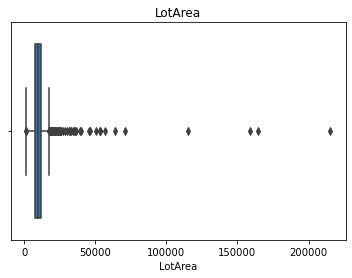

In [297]:
##lot area box plot
sns.boxplot(train.LotArea)
plt.title("LotArea")
plt.show()

(1445, 81)

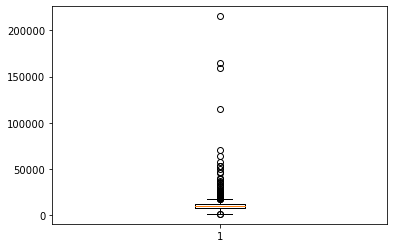

In [298]:
## treatment of outliers
# outlier treatment
plt.boxplot(train['LotArea'])
Q1 = train['LotArea'].quantile(0.05)
Q3 = train['LotArea'].quantile(0.95)
IQR = Q3 - Q1
train = train[(train['LotArea'] >= Q1 - 1.5*IQR) & 
                      (train['LotArea'] <= Q3 + 1.5*IQR)]
train.shape

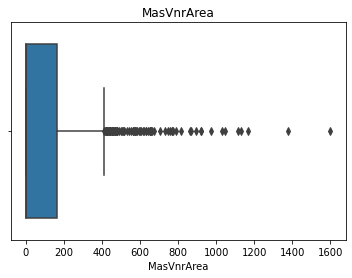

In [299]:
## Masonry veneer area sqft
sns.boxplot(train.MasVnrArea)
plt.title("MasVnrArea")
plt.show()

(1433, 81)

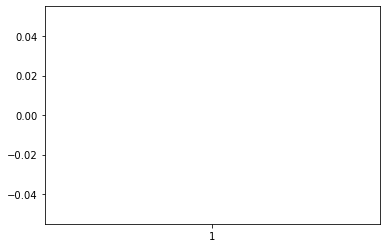

In [300]:
## up to 50% has 0 as value 
plt.boxplot(train['MasVnrArea'])
Q1 = train['MasVnrArea'].quantile(0.05)
Q3 = train['MasVnrArea'].quantile(0.95)
IQR = Q3 - Q1
train = train[(train['MasVnrArea'] >= Q1 - 1.5*IQR) & 
                      (train['MasVnrArea'] <= Q3 + 1.5*IQR)]
train.shape

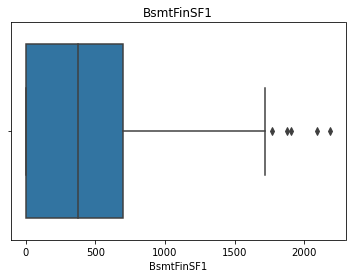

In [301]:
## BsmtFinSF1
sns.boxplot(train.BsmtFinSF1)
plt.title("BsmtFinSF1")
plt.show()

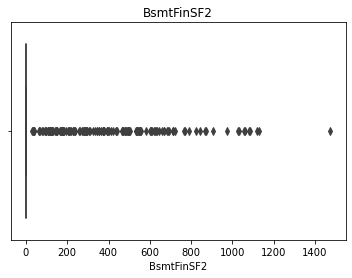

In [302]:
## BsmtFinSF2 looks a bit worse than bsmtfinSF1
sns.boxplot(train.BsmtFinSF2)
plt.title("BsmtFinSF2")
plt.show()

(1424, 81)

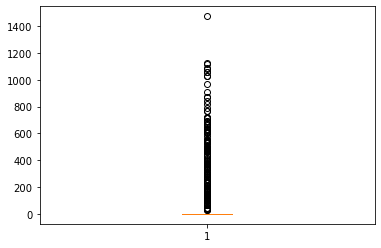

In [303]:
## up to 50% has 0 as value 
plt.boxplot(train['BsmtFinSF2'])
Q1 = train['BsmtFinSF2'].quantile(0.05)
Q3 = train['BsmtFinSF2'].quantile(0.95)
IQR = Q3 - Q1
train = train[(train['BsmtFinSF2'] >= Q1 - 1.5*IQR) & 
                      (train['BsmtFinSF2'] <= Q3 + 1.5*IQR)]
train.shape

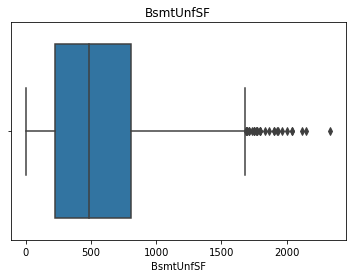

In [304]:
## BsmtUnfSF
sns.boxplot(train.BsmtUnfSF)
plt.title("BsmtUnfSF")
plt.show()

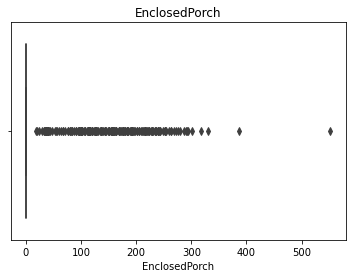

In [305]:
## EnclosedPorch
sns.boxplot(train.EnclosedPorch)
plt.title("EnclosedPorch")
plt.show()

(1423, 81)

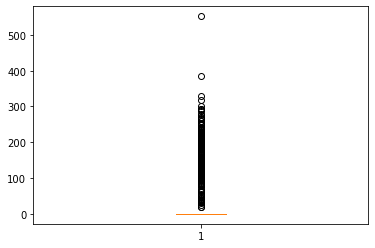

In [306]:
plt.boxplot(train['EnclosedPorch'])
Q1 = train['EnclosedPorch'].quantile(0.05)
Q3 = train['EnclosedPorch'].quantile(0.95)
IQR = Q3 - Q1
train = train[(train['EnclosedPorch'] >= Q1 - 1.5*IQR) & 
                      (train['EnclosedPorch'] <= Q3 + 1.5*IQR)]
train.shape

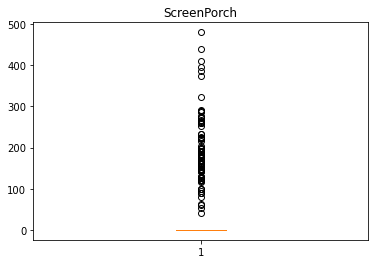

In [307]:
## ScreenPorch
plt.boxplot(train['ScreenPorch'])
plt.title("ScreenPorch")
plt.show()

(1419, 81)

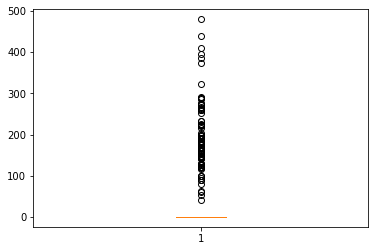

In [308]:
## treatment for ScreenPorch
plt.boxplot(train['ScreenPorch'])
Q1 = train['ScreenPorch'].quantile(0.05)
Q3 = train['ScreenPorch'].quantile(0.95)
IQR = Q3 - Q1
train = train[(train['ScreenPorch'] >= Q1 - 1.5*IQR) & 
                      (train['ScreenPorch'] <= Q3 + 1.5*IQR)]
train.shape

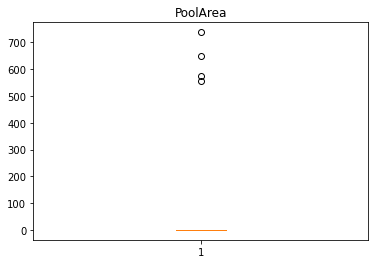

In [309]:
## PoolArea...maybe make pool alread a category since it is so overwhelmingly no pool
plt.boxplot(train['PoolArea'])
plt.title("PoolArea")
plt.show()

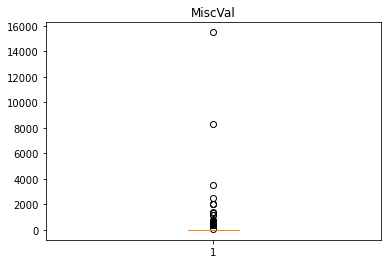

In [310]:
## MiscVal
plt.boxplot(train['MiscVal'])
plt.title("MiscVal")
plt.show()

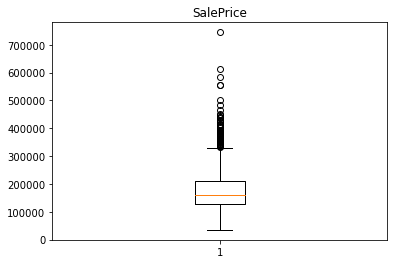

In [311]:
## SalePrice
plt.boxplot(train['SalePrice'])
plt.title("SalePrice")
plt.show()

(1414, 81)

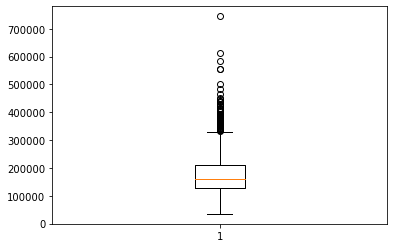

In [312]:
## treatment for SalePrice
plt.boxplot(train['SalePrice'])
Q1 = train['SalePrice'].quantile(0.1)
Q3 = train['SalePrice'].quantile(0.9)
IQR = Q3 - Q1
train = train[(train['SalePrice'] >= Q1 - 1.5*IQR) & 
                      (train['SalePrice'] <= Q3 + 1.5*IQR)]
train.shape

# Checking correlation b/w numeric vars

In [313]:
cor = train_numeric.corr()
cor

Id  LotFrontage   LotArea  MasVnrArea  BsmtFinSF1  \
Id             1.000000    -0.010601 -0.033226   -0.050298   -0.005024   
LotFrontage   -0.010601     1.000000  0.426095    0.193458    0.233633   
LotArea       -0.033226     0.426095  1.000000    0.104160    0.214103   
MasVnrArea    -0.050298     0.193458  0.104160    1.000000    0.264736   
BsmtFinSF1    -0.005024     0.233633  0.214103    0.264736    1.000000   
BsmtFinSF2    -0.005968     0.049900  0.111170   -0.072319   -0.050117   
BsmtUnfSF     -0.007940     0.132644 -0.002618    0.114442   -0.495251   
TotalBsmtSF   -0.015415     0.392075  0.260833    0.363936    0.522396   
1stFlrSF       0.010496     0.457181  0.299475    0.344501    0.445863   
2ndFlrSF       0.005590     0.080177  0.050986    0.174561   -0.137079   
LowQualFinSF  -0.044230     0.038469  0.004779   -0.069071   -0.064503   
GrLivArea      0.008273     0.402797  0.263116    0.390857    0.208171   
FullBath       0.005587     0.198769  0.126031    0.276833    0.058543   
HalfBath       0.006784     0.053532  0.014259    0.201444    0.004262   
GarageArea     0.017634     0.344997  0.180403    0.373066    0.296970   
WoodDeckSF    -0.029643     0.088521  0.171698    0.159718    0.204306   
OpenPorchSF   -0.000477     0.151972  0.084774    0.125703    0.111761   
EnclosedPorch  0.002889     0.010700 -0.018340   -0.110204   -0.102303   
3SsnPorch     -0.046635     0.070029  0.020423    0.018796    0.026451   
ScreenPorch    0.001330     0.041383  0.043160    0.061466    0.062021   
PoolArea       0.057044     0.206167  0.077672    0.011723    0.140491   
MiscVal       -0.006242     0.003368  0.038068   -0.029815    0.003571   
SalePrice     -0.021917     0.351799  0.263843    0.477493    0.386420   

               BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  \
Id              -0.005968  -0.007940    -0.015415  0.010496  0.005590   
LotFrontage      0.049900   0.132644     0.392075  0.457181  0.080177   
LotArea          0.111170  -0.002618     0.260833  0.299475  0.050986   
MasVnrArea      -0.072319   0.114442     0.363936  0.344501  0.174561   
BsmtFinSF1      -0.050117  -0.495251     0.522396  0.445863 -0.137079   
BsmtFinSF2       1.000000  -0.209294     0.104810  0.097117 -0.099260   
BsmtUnfSF       -0.209294   1.000000     0.415360  0.317987  0.004469   
TotalBsmtSF      0.104810   0.415360     1.000000  0.819530 -0.174512   
1stFlrSF         0.097117   0.317987     0.819530  1.000000 -0.202646   
2ndFlrSF        -0.099260   0.004469    -0.174512 -0.202646  1.000000   
LowQualFinSF     0.014807   0.028167    -0.033245 -0.014241  0.063353   
GrLivArea       -0.009640   0.240257     0.454868  0.566024  0.687501   
FullBath        -0.076444   0.288886     0.323722  0.380637  0.421378   
HalfBath        -0.032148  -0.041118    -0.048804 -0.119916  0.609707   
GarageArea      -0.018227   0.183303     0.486665  0.489782  0.138347   
WoodDeckSF       0.067898  -0.005316     0.232019  0.235459  0.092165   
OpenPorchSF      0.003093   0.129005     0.247264  0.211671  0.208026   
EnclosedPorch    0.036543  -0.002538    -0.095478 -0.065292  0.061989   
3SsnPorch       -0.029993   0.020764     0.037384  0.056104 -0.024358   
ScreenPorch      0.088871  -0.012579     0.084489  0.088758  0.040606   
PoolArea         0.041709  -0.035092     0.126053  0.131525  0.081487   
MiscVal          0.004940  -0.023837    -0.018479 -0.021096  0.016197   
SalePrice       -0.011378   0.214479     0.613581  0.605852  0.319334   

               LowQualFinSF  GrLivArea  FullBath  HalfBath  GarageArea  \
Id                -0.044230   0.008273  0.005587  0.006784    0.017634   
LotFrontage        0.038469   0.402797  0.198769  0.053532    0.344997   
LotArea            0.004779   0.263116  0.126031  0.014259    0.180403   
MasVnrArea        -0.069071   0.390857  0.276833  0.201444    0.373066   
BsmtFinSF1        -0.064503   0.208171  0.058543  0.004262    0.296970   
BsmtFinSF2         0.014807  -0.009640 -0.07644

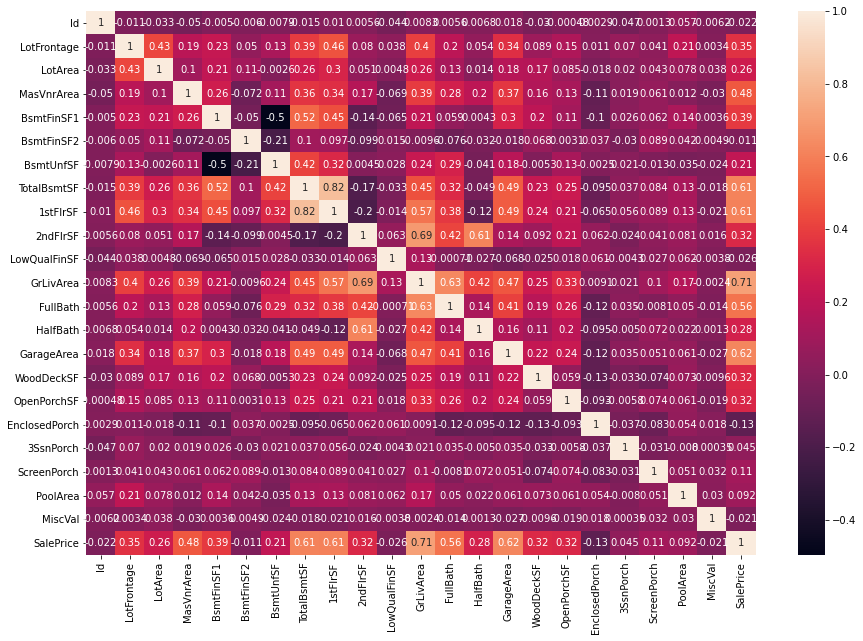

In [314]:
# heatmap
plt.figure(figsize=(15,10))
sns.heatmap(cor, annot=True)
plt.show()

In [315]:
## could drop ID, for now just ignore

# Continued Data Cleaning

In [316]:
train.isnull().sum() 

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       247
LotArea             0
Street              0
Alley            1327
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          0
MasVnrArea          0
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [317]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [318]:
## rerunning isnulls um after making rows/columns max
train.isnull().sum() 

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       247
LotArea             0
Street              0
Alley            1327
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          0
MasVnrArea          0
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [319]:
## % of missing values
round(100*(train.isnull().sum()/len(train.index)), 2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.47
LotArea           0.00
Street            0.00
Alley            93.85
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.00
MasVnrArea        0.00
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.62
BsmtCond          2.62
BsmtExposure      2.69
BsmtFinType1      2.62
BsmtFinSF1        0.00
BsmtFinType2      2.69
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF   

In [320]:
## will want to make some of the null values vars category: alley, fireplaceqc and poolqc
train['Alley'].fillna('No Alley', inplace=True)

In [321]:
## same as above adding fence and miscfeature to list of fills

train['FireplaceQu'].fillna('No Fireplace', inplace=True)
train['PoolQC'].fillna('No Pool', inplace=True) 
train['Fence'].fillna('No Fence', inplace=True)
train['MiscFeature'].fillna('No Feature', inplace=True)
train['LotFrontage'].fillna(0, inplace=True) 

In [322]:
## filling garage vars 

train['GarageType'].fillna('No Garage', inplace=True) 
train['GarageFinish'].fillna('No Garage', inplace=True) 
train['GarageQual'].fillna('No Garage', inplace=True) 
train['GarageCond'].fillna('No Garage', inplace=True)


In [323]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1414 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1414 non-null   int64  
 1   MSSubClass     1414 non-null   int64  
 2   MSZoning       1414 non-null   object 
 3   LotFrontage    1414 non-null   float64
 4   LotArea        1414 non-null   int64  
 5   Street         1414 non-null   object 
 6   Alley          1414 non-null   object 
 7   LotShape       1414 non-null   object 
 8   LandContour    1414 non-null   object 
 9   Utilities      1414 non-null   object 
 10  LotConfig      1414 non-null   object 
 11  LandSlope      1414 non-null   object 
 12  Neighborhood   1414 non-null   object 
 13  Condition1     1414 non-null   object 
 14  Condition2     1414 non-null   object 
 15  BldgType       1414 non-null   object 
 16  HouseStyle     1414 non-null   object 
 17  OverallQual    1414 non-null   int64  
 18  OverallC

In [324]:
## converting year variables to years from build instead of built

train['YearBuilt'] = 2021 - train['YearBuilt']
train['YearRemodAdd'] = 2021 - train['YearRemodAdd']
train['GarageYrBlt'] = 2021 - train['GarageYrBlt']
train['YrSold'] = 2021 - train['YrSold']

In [325]:
## converting some int variables to objects to be used as categorical

train['BsmtFullBath'] = train['BsmtFullBath'].astype('object')
train['BsmtHalfBath'] = train['BsmtHalfBath'].astype('object')
train['BedroomAbvGr'] = train['BedroomAbvGr'].astype('object')
train['KitchenAbvGr'] = train['KitchenAbvGr'].astype('object')
train['TotRmsAbvGrd'] = train['TotRmsAbvGrd'].astype('object')
train['OverallQual'] = train['OverallQual'].astype('object')
train['OverallCond'] = train['OverallCond'].astype('object')
train['MSSubClass'] = train['MSSubClass'].astype('object')
train['Fireplaces'] = train['Fireplaces'].astype('object')
train['GarageCars'] = train['GarageCars'].astype('object')
train['FullBath'] = train['FullBath'].astype('object')
train['HalfBath'] = train['HalfBath'].astype('object')



In [326]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1414 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1414 non-null   int64  
 1   MSSubClass     1414 non-null   object 
 2   MSZoning       1414 non-null   object 
 3   LotFrontage    1414 non-null   float64
 4   LotArea        1414 non-null   int64  
 5   Street         1414 non-null   object 
 6   Alley          1414 non-null   object 
 7   LotShape       1414 non-null   object 
 8   LandContour    1414 non-null   object 
 9   Utilities      1414 non-null   object 
 10  LotConfig      1414 non-null   object 
 11  LandSlope      1414 non-null   object 
 12  Neighborhood   1414 non-null   object 
 13  Condition1     1414 non-null   object 
 14  Condition2     1414 non-null   object 
 15  BldgType       1414 non-null   object 
 16  HouseStyle     1414 non-null   object 
 17  OverallQual    1414 non-null   object 
 18  OverallC

In [327]:
train.shape

(1414, 81)

In [329]:
train['GarageYrBlt'].fillna(0, inplace=True)

In [330]:
train['GarageYrBlt'].fillna(train['GarageYrBlt'].mode())

0        18.0
1        45.0
2        20.0
3        23.0
4        21.0
5        28.0
6        17.0
7        48.0
8        90.0
9        82.0
10       56.0
11       16.0
12       59.0
13       15.0
14       61.0
15       30.0
16       51.0
17       54.0
18       17.0
19       63.0
20       16.0
21       91.0
22       19.0
23       45.0
24       53.0
25       14.0
26       16.0
27       13.0
28       64.0
29      101.0
30      101.0
31       55.0
32       14.0
33       62.0
34       16.0
35       17.0
36       26.0
37       67.0
38       68.0
39        0.0
40       56.0
41       62.0
42       38.0
43       44.0
44       62.0
45       16.0
46       18.0
47       15.0
48        0.0
49       55.0
50       24.0
51       36.0
52       58.0
54       59.0
55       57.0
56       22.0
57       17.0
58       15.0
59       48.0
60       15.0
61       86.0
62       15.0
63       31.0
64       23.0
65       17.0
66       51.0
67       18.0
68       76.0
69       68.0
70       48.0
71       34.0
72    

In [331]:
train['GarageYrBlt']

0        18.0
1        45.0
2        20.0
3        23.0
4        21.0
5        28.0
6        17.0
7        48.0
8        90.0
9        82.0
10       56.0
11       16.0
12       59.0
13       15.0
14       61.0
15       30.0
16       51.0
17       54.0
18       17.0
19       63.0
20       16.0
21       91.0
22       19.0
23       45.0
24       53.0
25       14.0
26       16.0
27       13.0
28       64.0
29      101.0
30      101.0
31       55.0
32       14.0
33       62.0
34       16.0
35       17.0
36       26.0
37       67.0
38       68.0
39        0.0
40       56.0
41       62.0
42       38.0
43       44.0
44       62.0
45       16.0
46       18.0
47       15.0
48        0.0
49       55.0
50       24.0
51       36.0
52       58.0
54       59.0
55       57.0
56       22.0
57       17.0
58       15.0
59       48.0
60       15.0
61       86.0
62       15.0
63       31.0
64       23.0
65       17.0
66       51.0
67       18.0
68       76.0
69       68.0
70       48.0
71       34.0
72    

# dummies

In [332]:
## creating new df

new_train = train

In [333]:
dl1 =  ['CentralAir']

# Defining the map function
def binary_map(x):
    return x.map({'Y': 1, "N": 0})

# Applying the function
new_train[dl1] = new_train[dl1].apply(binary_map)


In [334]:
new_train[dl1].head()

CentralAir
0           1
1           1
2           1
3           1
4           1

In [335]:
dl2 =  ['Street']

# Defining the map function
def binary_map(x):
    return x.map({'Pave': 1, "Grvl": 0})

# Applying the function
new_train[dl2] = new_train[dl2].apply(binary_map)

In [336]:
dl3 =  ['Utilities']

# Defining the map function
def binary_map(x):
    return x.map({'AllPub': 1, "NoSeWa": 0})

# Applying the function
new_train[dl3] = new_train[dl3].apply(binary_map)

In [337]:
## y is ID, can drop now and use rest of vars in categorical dummy creation
X = new_train.drop([ 'Id'], axis=1)

In [338]:
train_category = X.select_dtypes(include=['object'])
train_category.head()

MSSubClass MSZoning     Alley LotShape LandContour LotConfig LandSlope  \
0         60       RL  No Alley      Reg         Lvl    Inside       Gtl   
1         20       RL  No Alley      Reg         Lvl       FR2       Gtl   
2         60       RL  No Alley      IR1         Lvl    Inside       Gtl   
3         70       RL  No Alley      IR1         Lvl    Corner       Gtl   
4         60       RL  No Alley      IR1         Lvl       FR2       Gtl   

  Neighborhood Condition1 Condition2 BldgType HouseStyle OverallQual  \
0      CollgCr       Norm       Norm     1Fam     2Story           7   
1      Veenker      Feedr       Norm     1Fam     1Story           6   
2      CollgCr       Norm       Norm     1Fam     2Story           7   
3      Crawfor       Norm       Norm     1Fam     2Story           7   
4      NoRidge       Norm       Norm     1Fam     2Story           8   

  OverallCond RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual  \
0           5     Gable  CompShg     VinylSd     VinylSd    BrkFace        Gd   
1           8     Gable  CompShg     MetalSd     MetalSd       None        TA   
2           5     Gable  CompShg     VinylSd     VinylSd    BrkFace        Gd   
3           5     Gable  CompShg     Wd Sdng     Wd Shng       None        TA   
4           5     Gable  CompShg     VinylSd     VinylSd    BrkFace        Gd   

  ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
0        TA      PConc       Gd       TA           No          GLQ   
1        TA     CBlock       Gd       TA           Gd          ALQ   
2        TA      PConc       Gd       TA           Mn          GLQ   
3        TA     BrkTil       TA       Gd           No          ALQ   
4        TA      PConc       Gd       TA           Av          GLQ   

  BsmtFinType2 Heating HeatingQC Electrical BsmtFullBath BsmtHalfBath  \
0          Unf    GasA        Ex      SBrkr            1            0   
1          Unf    GasA        Ex      SBrkr            0            1   
2          Unf    GasA        Ex      SBrkr            1            0   
3          Unf    GasA        Gd      SBrkr            1            0   
4          Unf    GasA        Ex      SBrkr            1            0   

  FullBath HalfBath BedroomAbvGr KitchenAbvGr KitchenQual TotRmsAbvGrd  \
0        2        1            3            1          Gd            8   
1        2        0            3            1          TA            6   
2        2        1            3            1          Gd            6   
3        1        0            3            1          Gd            7   
4        2        1            4            1          Gd            9   

  Functional Fireplaces   FireplaceQu GarageType GarageFinish GarageCars  \
0        Typ          0  No Fireplace     Attchd          RFn          2   
1        Typ          1            TA     Attchd          RFn          2   
2        Typ          1            TA     Attchd          RFn          2   
3        Typ          1            Gd     Detchd          Unf          3   
4        Typ          1            TA     Attchd          RFn          3   

  GarageQual GarageCond PavedDrive   PoolQC     Fence MiscFeature SaleType  \
0         TA         TA          Y  No Pool  No Fence  No Feature       WD   
1         TA         TA          Y  No Pool  No Fence  No Feature       WD   
2         TA         TA          Y  No Pool  No Fence  No Feature       WD   
3         TA         TA          Y  No Pool  No Fence  No Feature       WD   
4         TA         TA          Y  No Pool  No Fence  No Feature       WD   

  SaleCondition  
0        Normal  
1        Normal  
2        Normal  
3       Abnorml  
4        Normal

In [339]:
train_dum = pd.get_dummies(train_category, drop_first=True)
train_dum.head()

MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  \
0              0              0              0              0              1   
1              0              0              0              0              0   
2              0              0              0              0              1   
3              0              0              0              0              0   
4              0              0              0              0              1   

   MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              1              0              0              0              0   
4              0              0              0              0              0   

   MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  \
0               0               0               0               0   
1               0               0               0               0   
2               0               0               0               0   
3               0               0               0               0   
4               0               0               0               0   

   MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Alley_No Alley  \
0            0            0            1            0               1   
1            0            0            1            0               1   
2            0            0            1            0               1   
3            0            0            1            0               1   
4            0            0            1            0               1   

   Alley_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  \
0           0             0             0             1                0   
1           0             0             0             1                0   
2           0             0             0             0                0   
3           0             0             0             0                0   
4           0             0             0             0                0   

   LandContour_Low  LandContour_Lvl  LotConfig_CulDSac  LotConfig_FR2  \
0                0                1                  0              0   
1                0                1                  0              1   
2                0                1                  0              0   
3                0                1                  0              0   
4                0                1                  0              1   

   LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  \
0              0                 1              0              0   
1              0                 0              0              0   
2              0                 1              0              0   
3              0                 0              0              0   
4              0                 0              0              0   

   Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  \
0                     0                    0                     0   
1                     0                    0                     0   
2                     0                    0                     0   
3                     0                    0                     0   
4                     0                    0                     0   

   Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  \
0                     0                     1                     0   
1                     0                     0                     0   
2                     0                     1                     0   
3                     0                     0                     1   
4                     0                     0                     0   

   Neighborhood_Edwards  Neighborh

In [340]:
## dropping unnecessary

new_train = new_train.drop(list(train_category.columns), axis=1)

In [341]:
## adding dummies back to X 

new_train = pd.concat([new_train, train_dum], axis=1)

In [342]:
## checkign shape
new_train.shape

(1414, 309)

In [343]:
new_train.head()

Id  LotFrontage  LotArea  Street  Utilities  YearBuilt  YearRemodAdd  \
0   1         65.0     8450       1          1         18            18   
1   2         80.0     9600       1          1         45            45   
2   3         68.0    11250       1          1         20            19   
3   4         60.0     9550       1          1        106            51   
4   5         84.0    14260       1          1         21            21   

   MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  CentralAir  \
0       196.0         706           0        150          856           1   
1         0.0         978           0        284         1262           1   
2       162.0         486           0        434          920           1   
3         0.0         216           0        540          756           1   
4       350.0         655           0        490         1145           1   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  GarageYrBlt  GarageArea  \
0       856       854             0       1710         18.0         548   
1      1262         0             0       1262         45.0         460   
2       920       866             0       1786         20.0         608   
3       961       756             0       1717         23.0         642   
4      1145      1053             0       2198         21.0         836   

   WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  \
0           0           61              0          0            0         0   
1         298            0              0          0            0         0   
2           0           42              0          0            0         0   
3           0           35            272          0            0         0   
4         192           84              0          0            0         0   

   MiscVal  MoSold  YrSold  SalePrice  MSSubClass_30  MSSubClass_40  \
0        0       2      13     208500              0              0   
1        0       5      14     181500              0              0   
2        0       9      13     223500              0              0   
3        0       2      15     140000              0              0   
4        0      12      13     250000              0              0   

   MSSubClass_45  MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  \
0              0              0              1              0              0   
1              0              0              0              0              0   
2              0              0              1              0              0   
3              0              0              0              1              0   
4              0              0              1              0              0   

   MSSubClass_80  MSSubClass_85  MSSubClass_90  MSSubClass_120  \
0              0              0              0               0   
1              0              0              0               0   
2              0              0              0               0   
3              0              0              0               0   
4              0              0              0               0   

   MSSubClass_160  MSSubClass_180  MSSubClass_190  MSZoning_FV  MSZoning_RH  \
0               0               0               0            0            0   
1               0               0               0            0            0   
2               0               0               0            0            0   
3               0               0               0            0            0   
4               0               0               0            0            0   

   MSZoning_RL  MSZoning_RM  Alley_No Alley  Alley_Pave  LotShape_IR2  \
0            1            0               1           0             0   
1            1            0               1           0             0   
2            1            0               1           0             0   
3            1            0               1           0             0   
4            1    

In [344]:
X = new_train.head(1414)
y = np.log(X.SalePrice)
X = X.drop("SalePrice",1)

# scaling and train/test

In [345]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [346]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [347]:
X_train.shape

(989, 308)

In [241]:
##had an NA value error
round(100*(new_train.isnull().sum()/len(new_train.index)), 2)

Id                          0.00
LotFrontage                 0.00
LotArea                     0.00
Street                      0.00
Utilities                   0.00
YearBuilt                   0.00
YearRemodAdd                0.00
MasVnrArea                  0.00
BsmtFinSF1                  0.00
BsmtFinSF2                  0.00
BsmtUnfSF                   0.00
TotalBsmtSF                 0.00
CentralAir                  0.00
1stFlrSF                    0.00
2ndFlrSF                    0.00
LowQualFinSF                0.00
GrLivArea                   0.00
GarageYrBlt                 5.73
GarageArea                  0.00
WoodDeckSF                  0.00
OpenPorchSF                 0.00
EnclosedPorch               0.00
3SsnPorch                   0.00
ScreenPorch                 0.00
PoolArea                    0.00
MiscVal                     0.00
MoSold                      0.00
YrSold                      0.00
SalePrice                   0.00
MSSubClass_30               0.00
MSSubClass

# Ridge Regression L2

In [381]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 200, 500, 1000]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 29 candidates, totalling 145 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 145 out of 145 | elapsed:    2.7s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 200, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [382]:
#checking the value of optimum number of parameters
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 8.0}
-0.07996676140749523


In [383]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1000]
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.018549      0.010603         0.007580    4.746261e-03      0.0001   
1        0.010970      0.002093         0.004592    1.618805e-03       0.001   
2        0.010771      0.002475         0.004388    1.352810e-03        0.01   
3        0.008178      0.000399         0.003191    3.998285e-04        0.05   
4        0.009974      0.001892         0.004590    1.355808e-03         0.1   
5        0.009574      0.002239         0.003192    3.987789e-04         0.2   
6        0.008777      0.000746         0.003989    1.092754e-03         0.3   
7        0.009774      0.001934         0.003590    4.886361e-04         0.4   
8        0.010572      0.002410         0.004787    1.465843e-03         0.5   
9        0.009974      0.002092         0.004188    9.772526e-04         0.6   
10       0.010772      0.002309         0.003390    4.886166e-04         0.7   
11       0.009577      0.001738         0.003389    4.863395e-04         0.8   
12       0.010572      0.002238         0.004787    7.464170e-04         0.9   
13       0.009575      0.001739         0.003391    4.888504e-04           1   
14       0.010173      0.002129         0.005186    1.465979e-03           2   
15       0.008378      0.000488         0.002991    9.536743e-08           3   
16       0.009375      0.001850         0.003789    7.467482e-04           4   
17       0.008777      0.000977         0.003989    1.092623e-03           5   
18       0.009774      0.002221         0.004188    9.773114e-04           6   
19       0.010772      0.002221         0.004786    1.163587e-03           7   
20       0.009575      0.001197         0.002991    3.504023e-07           8   
21       0.008976      0.001546         0.003590    4.888310e-04           9   
22       0.008976      0.000631         0.003590    7.979276e-04          10   
23       0.009178      0.000749         0.003388    7.992631e-04          20   
24       0.009375      0.000489         0.004188    1.163391e-03          50   
25       0.010772      0.001934         0.003390    4.890644e-04         100   
26       0.009374      0.001850         0.003590    7.981420e-04         200   
27       0.010173      0.002394         0.004388    1.017205e-03         500   
28       0.011569      0.002239         0.004787    1.163522e-03        1000   

               params  split0_test_score  split1_test_score  \
0   {'alpha': 0.0001}          -0.097126          -0.117682   
1    {'alpha': 0.001}          -0.096932          -0.117370   
2     {'alpha': 0.01}          -0.096071          -0.114589   
3     {'alpha': 0.05}          -0.094828          -0.107265   
4      {'alpha': 0.1}          -0.093411          -0.102850   
5      {'alpha': 0.2}          -0.091363          -0.097537   
6      {'alpha': 0.3}          -0.090296          -0.094289   
7      {'alpha': 0.4}          -0.089530          -0.092225   
8      {'alpha': 0.5}          -0.088911          -0.091119   
9      {'alpha': 0.6}          -0.088406          -0.090208   
10     {'alpha': 0.7}          -0.087955          -0.089440   
11     {'alpha': 0.8}          -0.087537          -0.088818   
12     {'alpha': 0.9}          -0.087156          -0.088291   
13     {'alpha': 1.0}          -0.086795          -0.087833   
14     {'alpha': 2.0}          -0.084941          -0.085225   
15     {'alpha': 3.0}          -0.083927          -0.084433   
16     {'alpha': 4.0}          -0.083365          -0.083985   
17     {'alpha': 5.0}          -0.083012          -0.083660   
18     {'alpha': 6.0}          -0.082952          -0.083467   
19     {'alpha': 7.0}          -0.082933          -0.083364   
20     {'alpha': 8.0}          -0.082975          -0.083374   
21     {'alpha': 9.0}          -0.083024          -0.083532   
22    {'alpha': 10.0}          -0.083125          -0.083718   
23      {'alpha': 20}          -0.085086          -0.085643   
24      {'alpha': 50}       

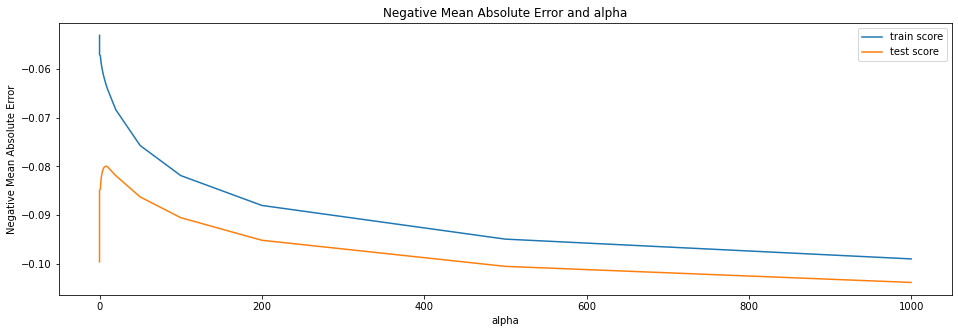

In [384]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.figure(figsize=(16,5))

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [385]:
## from best params we got alpha to be 8 
alpha = 8
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-5.77641759e-06,  1.11725601e-04,  4.31323840e-06,  4.09140457e-02,
        0.00000000e+00, -2.72023988e-03, -1.70652654e-03,  3.68392433e-05,
        7.01652452e-05,  3.96417247e-05, -1.18344390e-05,  9.79725319e-05,
        5.00373953e-02,  9.26753986e-05,  9.81921464e-05, -2.63588214e-06,
        1.88231662e-04,  1.34592582e-04,  9.74755318e-05,  1.06082303e-04,
        5.85287992e-06,  1.68568864e-04,  1.41173391e-05,  2.03121649e-04,
        9.11144910e-05,  2.97061061e-06,  1.70913765e-04,  3.28099922e-03,
        1.17121371e-04, -7.49890928e-03,  9.53650039e-03, -6.22849042e-03,
       -1.93560957e-02,  6.51385937e-02,  3.68566384e-03, -6.34101836e-03,
       -1.58800082e-03, -2.32093580e-03,  1.57643997e-02, -7.99540377e-02,
       -1.36687256e-02,  5.68740744e-03,  7.77059950e-02,  2.83732615e-02,
        5.22979087e-02,  1.16265027e-02, -1.98189003e-02,  2.63913934e-02,
        2.89823036e-02, -1.38183850e-02, -6.23821001e-03,  2.04263378e-02,
       -4.08529682e-02, -

In [371]:
y_train_pred = ridge.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.944985893757463


In [391]:
fromonerss = 1-(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
fromonerss

0.055014106242537

In [387]:
## checking what doubling alpha would do 
alpha_double = 200
ridge_double = Ridge(alpha=alpha_double)

ridge_double.fit(X_train, y_train)
ridge_double.coef_

array([-1.01258134e-05,  2.72959795e-04,  4.41044916e-06,  4.56986823e-03,
        0.00000000e+00, -2.85120152e-03, -3.30507589e-03,  6.22838041e-05,
        1.15169141e-04,  1.10718653e-05,  1.09221470e-05,  1.37163154e-04,
        1.86677606e-02,  8.98062899e-05,  1.21364817e-04, -1.41740429e-05,
        1.96997064e-04,  8.93124320e-04,  1.65126282e-04,  9.08902652e-05,
        3.95137170e-05,  2.05909131e-04, -1.56560313e-04,  2.73099639e-04,
        6.68208218e-05, -1.07004841e-06,  1.10099041e-03,  4.24944542e-03,
       -5.87320310e-03, -2.61607440e-04,  2.70021745e-03,  3.37149480e-05,
       -2.10463905e-03,  1.80770056e-02,  3.56955471e-04,  3.84927284e-03,
        9.87519770e-04, -5.03976030e-03,  4.56468434e-03, -1.36297423e-02,
       -2.41945674e-03, -1.31178854e-03,  1.09035442e-02,  6.76383819e-04,
        1.63030696e-02, -1.49546470e-02, -3.22892607e-03,  3.61727148e-03,
        3.79930070e-03, -2.53739620e-03, -9.07657865e-03,  8.29688818e-03,
       -6.76409560e-03, -

In [365]:
# model coefficients
cols = X.columns
cols = cols.insert(0, "constant")
model_parameters = list(ridge.coef_)
list(zip(cols, model_parameters))

[('constant', -5.776417592051218e-06),
 ('Id', 0.0001117256011313353),
 ('LotFrontage', 4.313238397749224e-06),
 ('LotArea', 0.04091404574570581),
 ('Street', 0.0),
 ('Utilities', -0.00272023987809497),
 ('YearBuilt', -0.0017065265393588229),
 ('YearRemodAdd', 3.6839243312876057e-05),
 ('MasVnrArea', 7.016524518817695e-05),
 ('BsmtFinSF1', 3.964172471324892e-05),
 ('BsmtFinSF2', -1.1834438964243636e-05),
 ('BsmtUnfSF', 9.797253193097239e-05),
 ('TotalBsmtSF', 0.05003739527442329),
 ('CentralAir', 9.267539857245357e-05),
 ('1stFlrSF', 9.819214644714328e-05),
 ('2ndFlrSF', -2.6358821388513658e-06),
 ('LowQualFinSF', 0.00018823166231370157),
 ('GrLivArea', 0.000134592582151276),
 ('GarageYrBlt', 9.747553175952438e-05),
 ('GarageArea', 0.00010608230291885624),
 ('WoodDeckSF', 5.852879921000572e-06),
 ('OpenPorchSF', 0.00016856886383981046),
 ('EnclosedPorch', 1.4117339117962143e-05),
 ('3SsnPorch', 0.00020312164909170273),
 ('ScreenPorch', 9.111449098214468e-05),
 ('PoolArea', 2.9706106091

In [388]:
# predict doubling effect
y_train_pred_double = ridge_double.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred_double))

0.9009257053601378


In [397]:
y_test_pred = ridge.predict(X_test)
print(metrics.r2_score(y_true=np.exp(y_test), y_pred=np.exp(y_test_pred)))

0.9030147008370966


In [373]:
## creating a df to use for RFE ranking

ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df.reset_index(drop=True, inplace=True)
ridge_df

Features  Coefficient
0                          Id      -0.0000
1                 LotFrontage       0.0001
2                     LotArea       0.0000
3                      Street       0.0409
4                   Utilities       0.0000
5                   YearBuilt      -0.0027
6                YearRemodAdd      -0.0017
7                  MasVnrArea       0.0000
8                  BsmtFinSF1       0.0001
9                  BsmtFinSF2       0.0000
10                  BsmtUnfSF      -0.0000
11                TotalBsmtSF       0.0001
12                 CentralAir       0.0500
13                   1stFlrSF       0.0001
14                   2ndFlrSF       0.0001
15               LowQualFinSF      -0.0000
16                  GrLivArea       0.0002
17                GarageYrBlt       0.0001
18                 GarageArea       0.0001
19                 WoodDeckSF       0.0001
20                OpenPorchSF       0.0000
21              EnclosedPorch       0.0002
22                  3SsnPorch       0.0000
23                ScreenPorch       0.0002
24                   PoolArea       0.0001
25                    MiscVal       0.0000
26                     MoSold       0.0002
27                     YrSold       0.0033
28              MSSubClass_30       0.0001
29              MSSubClass_40      -0.0075
30              MSSubClass_45       0.0095
31              MSSubClass_50      -0.0062
32              MSSubClass_60      -0.0194
33              MSSubClass_70       0.0651
34              MSSubClass_75       0.0037
35              MSSubClass_80      -0.0063
36              MSSubClass_85      -0.0016
37              MSSubClass_90      -0.0023
38             MSSubClass_120       0.0158
39             MSSubClass_160      -0.0800
40             MSSubClass_180      -0.0137
41             MSSubClass_190       0.0057
42                MSZoning_FV       0.0777
43                MSZoning_RH       0.0284
44                MSZoning_RL       0.0523
45                MSZoning_RM       0.0116
46             Alley_No Alley      -0.0198
47                 Alley_Pave       0.0264
48               LotShape_IR2       0.0290
49               LotShape_IR3      -0.0138
50               LotShape_Reg      -0.0062
51            LandContour_HLS       0.0204
52            LandContour_Low      -0.0409
53            LandContour_Lvl      -0.0058
54          LotConfig_CulDSac       0.0199
55              LotConfig_FR2      -0.0196
56              LotConfig_FR3      -0.0009
57           LotConfig_Inside      -0.0143
58              LandSlope_Mod      -0.0043
59              LandSlope_Sev      -0.0306
60       Neighborhood_Blueste       0.0096
61        Neighborhood_BrDale      -0.0109
62       Neighborhood_BrkSide       0.0292
63       Neighborhood_ClearCr       0.0128
64       Neighborhood_CollgCr      -0.0088
65       Neighborhood_Crawfor       0.0881
66       Neighborhood_Edwards      -0.0406
67       Neighborhood_Gilbert      -0.0146
68        Neighborhood_IDOTRR      -0.0826
69       Neighborhood_MeadowV      -0.0682
70       Neighborhood_Mitchel      -0.0380
71         Neighborhood_NAmes      -0.0001
72       Neighborhood_NPkVill       0.0258
73        Neighborhood_NWAmes      -0.0095
74       Neighborhood_NoRidge       0.0060
75       Neighborhood_NridgHt       0.0387
76       Neighborhood_OldTown      -0.0181
77         Neighborhood_SWISU       0.0226
78        Neighborhood_Sawyer      -0.0228
79       Neighborhood_SawyerW      -0.0012
80       Neighborhood_Somerst       0.0300
81       Neighborhood_StoneBr       0.0894
82        Neighborhood_Timber      -0.0088
83       Neighborhood_Veenker       0.0020
84           Condition1_Feedr       0.0103
85            Condition1_Norm       0.0303
86            Condition1_PosA      -0.0155
87            Condition1_PosN       0.0123
88            Condition1_RRAe      -0.0338
89            Condition1_RRAn       0.0134
90            Condition1_RRNe      -0.0088
91            Condition1_RRNn       0.0190
92           Condition

In [389]:

rsquare = metrics.r2_score(y_true=y_train, y_pred=y_train_pred_double)
rssone = 1-rsquare
rssone

0.09907429463986217

In [375]:
from sklearn.feature_selection import RFE

In [376]:
X_train_ridge = X_train[ridge_df.Features]

lm = LinearRegression()
lm.fit(X_train_ridge, y_train)

# running RFE
rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train_ridge, y_train)

In [377]:
## crating a dictionary to be used to bar plot/ranking RFA
ridge_coeff_dict = dict(pd.Series(ridge.coef_.round(5), index = X_train.columns))
ridge_coeff_dict

{'Id': -1e-05,
 'LotFrontage': 0.00011,
 'LotArea': 0.0,
 'Street': 0.04091,
 'Utilities': 0.0,
 'YearBuilt': -0.00272,
 'YearRemodAdd': -0.00171,
 'MasVnrArea': 4e-05,
 'BsmtFinSF1': 7e-05,
 'BsmtFinSF2': 4e-05,
 'BsmtUnfSF': -1e-05,
 'TotalBsmtSF': 0.0001,
 'CentralAir': 0.05004,
 '1stFlrSF': 9e-05,
 '2ndFlrSF': 0.0001,
 'LowQualFinSF': -0.0,
 'GrLivArea': 0.00019,
 'GarageYrBlt': 0.00013,
 'GarageArea': 0.0001,
 'WoodDeckSF': 0.00011,
 'OpenPorchSF': 1e-05,
 'EnclosedPorch': 0.00017,
 '3SsnPorch': 1e-05,
 'ScreenPorch': 0.0002,
 'PoolArea': 9e-05,
 'MiscVal': 0.0,
 'MoSold': 0.00017,
 'YrSold': 0.00328,
 'MSSubClass_30': 0.00012,
 'MSSubClass_40': -0.0075,
 'MSSubClass_45': 0.00954,
 'MSSubClass_50': -0.00623,
 'MSSubClass_60': -0.01936,
 'MSSubClass_70': 0.06514,
 'MSSubClass_75': 0.00369,
 'MSSubClass_80': -0.00634,
 'MSSubClass_85': -0.00159,
 'MSSubClass_90': -0.00232,
 'MSSubClass_120': 0.01576,
 'MSSubClass_160': -0.07995,
 'MSSubClass_180': -0.01367,
 'MSSubClass_190': 0.0056

In [378]:
def find(x):
    return ridge_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

temp1_df = pd.DataFrame(list(zip( X_train_ridge.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp1_df = temp1_df.loc[temp1_df['rfe_support'] == True]
temp1_df.reset_index(drop=True, inplace=True)

temp1_df['Coefficient'] = temp1_df['Features'].apply(find)
temp1_df = temp1_df.sort_values(by=['Coefficient'], ascending=False)
temp1_df = temp1_df.head(10)
temp1_df

Features  rfe_support  rfe_ranking  Coefficient
2     OverallQual_9         True            1      0.08368
1     OverallQual_8         True            1      0.06316
3    OverallQual_10         True            1      0.02916
10   TotRmsAbvGrd_8         True            1      0.02379
8    TotRmsAbvGrd_6         True            1      0.02045
9    TotRmsAbvGrd_7         True            1      0.01864
12  TotRmsAbvGrd_10         True            1      0.00899
7    TotRmsAbvGrd_5         True            1      0.00873
11   TotRmsAbvGrd_9         True            1      0.00226
5    TotRmsAbvGrd_3         True            1      0.00150

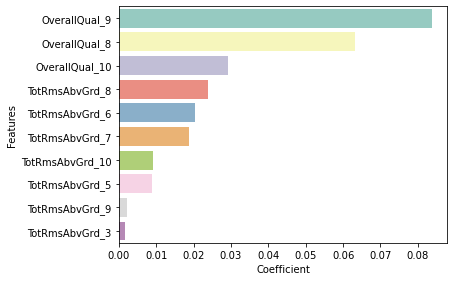

In [380]:
plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set3', data = temp1_df)
plt.show()

# Lasso

In [354]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 26 candidates, totalling 130 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 130 out of 130 | elapsed:    4.9s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [355]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.121475      0.038038         0.005589    1.018920e-03      0.0001   
1        0.021941      0.005086         0.003990    6.309019e-04       0.001   
2        0.014761      0.003179         0.004189    9.771942e-04        0.01   
3        0.048869      0.003337         0.005585    1.352803e-03        0.05   
4        0.035305      0.006389         0.003789    1.163056e-03         0.1   
5        0.029321      0.002646         0.003989    8.924432e-04         0.2   
6        0.031915      0.002360         0.004388    1.352726e-03         0.3   
7        0.031516      0.006572         0.005385    1.197299e-03         0.4   
8        0.040493      0.013816         0.005393    3.012034e-03         0.5   
9        0.037100      0.008588         0.004189    9.770093e-04         0.6   
10       0.027726      0.005255         0.004588    1.196631e-03         0.7   
11       0.042487      0.021011         0.007779    2.918016e-03         0.8   
12       0.023736      0.005512         0.004189    9.772627e-04         0.9   
13       0.039291      0.016657         0.008580    3.434884e-03           1   
14       0.023139      0.008589         0.006184    2.553845e-03           2   
15       0.015159      0.002309         0.004787    1.466142e-03           3   
16       0.014161      0.002555         0.004588    1.353190e-03           4   
17       0.011768      0.000747         0.003590    4.890645e-04           5   
18       0.012566      0.002054         0.004189    1.164340e-03           6   
19       0.015159      0.001829         0.004189    1.163121e-03           7   
20       0.012965      0.003026         0.003790    7.469267e-04           8   
21       0.010970      0.001545         0.003391    4.885583e-04           9   
22       0.015558      0.003546         0.005984    6.309773e-04          10   
23       0.013367      0.002934         0.004386    1.016193e-03          20   
24       0.010372      0.002326         0.003789    1.163072e-03          50   
25       0.010572      0.001353         0.002991    9.464947e-07         100   

               params  split0_test_score  split1_test_score  \
0   {'alpha': 0.0001}          -0.085219          -0.088972   
1    {'alpha': 0.001}          -0.086236          -0.085264   
2     {'alpha': 0.01}          -0.105907          -0.112694   
3     {'alpha': 0.05}          -0.106392          -0.114184   
4      {'alpha': 0.1}          -0.106364          -0.114218   
5      {'alpha': 0.2}          -0.107550          -0.115331   
6      {'alpha': 0.3}          -0.108467          -0.116802   
7      {'alpha': 0.4}          -0.109106          -0.117327   
8      {'alpha': 0.5}          -0.110013          -0.117947   
9      {'alpha': 0.6}          -0.111384          -0.118781   
10     {'alpha': 0.7}          -0.112966          -0.119699   
11     {'alpha': 0.8}          -0.114451          -0.120563   
12     {'alpha': 0.9}          -0.116008          -0.121625   
13     {'alpha': 1.0}          -0.117790          -0.122857   
14     {'alpha': 2.0}          -0.139106          -0.138121   
15     {'alpha': 3.0}          -0.154574          -0.154491   
16     {'alpha': 4.0}          -0.155583          -0.154917   
17     {'alpha': 5.0}          -0.156156          -0.154845   
18     {'alpha': 6.0}          -0.156903          -0.155097   
19     {'alpha': 7.0}          -0.157705          -0.156067   
20     {'alpha': 8.0}          -0.158543          -0.157740   
21     {'alpha': 9.0}          -0.159102          -0.159438   
22    {'alpha': 10.0}          -0.159804          -0.160792   
23      {'alpha': 20}          -0.172381          -0.176842   
24      {'alpha': 50}          -0.214371          -0.210142   
25     {'alpha': 100}          -0.288834          -0.266548   

    split2_test_score  split3_test_score  split4_test_score  mean_test_score  \
0           -0.072645          -0.084487          -0.088513  

In [356]:
## R-squared value of the lasso model
model_cv1 = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      
# fit the model
model_cv1.fit(X_train, y_train) 

Fitting 5 folds for each of 26 candidates, totalling 130 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 130 out of 130 | elapsed:    4.9s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100]},
             return_train_score=True, scoring='r2', verbose=1)

In [357]:
##lassso CV results
# cv results
cv_results1 = pd.DataFrame(model_cv1.cv_results_)
cv_results1

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.150796      0.048881         0.004787        0.000746      0.0001   
1        0.023337      0.005224         0.003989        0.000892       0.001   
2        0.013762      0.002476         0.004388        0.000798        0.01   
3        0.047274      0.006263         0.005186        0.001163        0.05   
4        0.037300      0.006135         0.004388        0.000798         0.1   
5        0.034508      0.005375         0.003191        0.000399         0.2   
6        0.034110      0.005513         0.004188        0.000397         0.3   
7        0.034906      0.003837         0.004987        0.000893         0.4   
8        0.044282      0.017633         0.006584        0.002243         0.5   
9        0.033111      0.003646         0.005784        0.000977         0.6   
10       0.029121      0.004008         0.004588        0.001197         0.7   
11       0.039494      0.012011         0.006782        0.001934         0.8   
12       0.022539      0.002999         0.004788        0.001829         0.9   
13       0.020944      0.002524         0.003590        0.000489           1   
14       0.014962      0.001780         0.004386        0.001014           2   
15       0.014162      0.001935         0.004787        0.000977           3   
16       0.014560      0.002409         0.004787        0.001466           4   
17       0.011768      0.001163         0.004388        0.001353           5   
18       0.012965      0.001784         0.003591        0.000489           6   
19       0.011768      0.000747         0.003990        0.000631           7   
20       0.014761      0.003180         0.004388        0.000798           8   
21       0.012566      0.002932         0.004188        0.000977           9   
22       0.010771      0.000746         0.004388        0.000798          10   
23       0.009774      0.001596         0.003390        0.000798          20   
24       0.009574      0.001739         0.003591        0.000488          50   
25       0.009774      0.002129         0.003989        0.001093         100   

               params  split0_test_score  split1_test_score  \
0   {'alpha': 0.0001}           0.899626           0.883080   
1    {'alpha': 0.001}           0.913699           0.891548   
2     {'alpha': 0.01}           0.861030           0.824610   
3     {'alpha': 0.05}           0.857937           0.819346   
4      {'alpha': 0.1}           0.857190           0.818058   
5      {'alpha': 0.2}           0.853447           0.813846   
6      {'alpha': 0.3}           0.850478           0.808419   
7      {'alpha': 0.4}           0.848875           0.805756   
8      {'alpha': 0.5}           0.846933           0.803273   
9      {'alpha': 0.6}           0.844637           0.800357   
10     {'alpha': 0.7}           0.841924           0.797298   
11     {'alpha': 0.8}           0.839418           0.794211   
12     {'alpha': 0.9}           0.836495           0.790834   
13     {'alpha': 1.0}           0.833155           0.787023   
14     {'alpha': 2.0}           0.787071           0.748402   
15     {'alpha': 3.0}           0.748325           0.716059   
16     {'alpha': 4.0}           0.747042           0.718089   
17     {'alpha': 5.0}           0.746600           0.719876   
18     {'alpha': 6.0}           0.745638           0.720101   
19     {'alpha': 7.0}           0.744152           0.718685   
20     {'alpha': 8.0}           0.742842           0.714673   
21     {'alpha': 9.0}           0.742182           0.709930   
22    {'alpha': 10.0}           0.741175           0.705248   
23      {'alpha': 20}           0.711907           0.640636   
24      {'alpha': 50}           0.559765           0.507716   
25     {'alpha': 100}           0.214125           0.260185   

    split2_test_score  split3_test_score  split4_test_score  mean_test_score  \
0            0.933454           0.887550           0.890888  

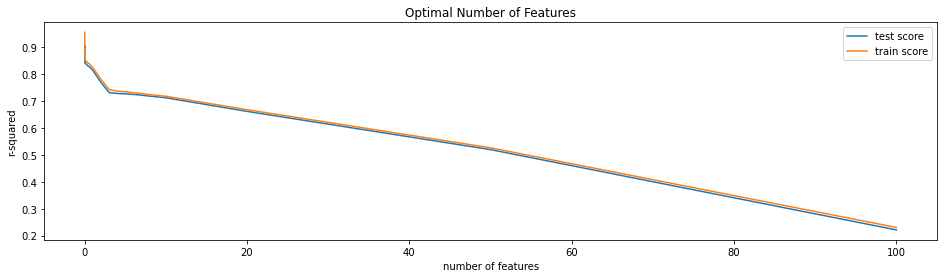

In [358]:
## plotting results 

# plotting cv results
plt.figure(figsize=(16,4))

plt.plot(cv_results1["param_alpha"], cv_results1["mean_test_score"])
plt.plot(cv_results1["param_alpha"], cv_results1["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper right')

In [359]:
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 0.001}
-0.08212982169169511


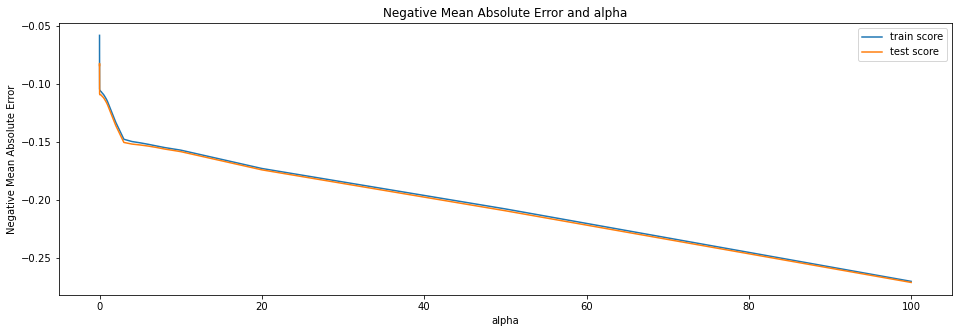

In [360]:
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.figure(figsize=(16,5))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [361]:
alpha = 0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.001)

In [386]:
## doubling

lm_double = Lasso(alpha=0.002)
lm_double.fit(X_train, y_train)

# predict
y_train_pred_double = lm_double.predict(X_train)
print('The training accuracy is:')
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred_double))
y_test_pred_double = lm.predict(X_test)
print('The test accuracy is:')
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred_double))

The training accuracy is:
0.9128650262241115
The test accuracy is:
0.8523111098426318


### doubling moved away from 0 making both traina nd test less effective due to feature selection

In [362]:
y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.9304808925131675


In [363]:
y_test_pred = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8820107408934552


In [364]:
from sklearn.metrics import mean_squared_error
print ('RMSE is: \n', mean_squared_error(y_test, y_test_pred))

RMSE is: 
 0.015660935137642832


In [392]:
## features for lasso
lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df.reset_index(drop=True, inplace=True)
lasso_df

Features  Coefficient
0                LotFrontage       0.0002
1                  YearBuilt      -0.0030
2               YearRemodAdd      -0.0022
3                 BsmtFinSF1       0.0002
4                 BsmtFinSF2       0.0001
5                  BsmtUnfSF       0.0001
6                 CentralAir       0.0529
7                   1stFlrSF       0.0003
8                   2ndFlrSF       0.0002
9               LowQualFinSF       0.0001
10               GarageYrBlt       0.0006
11                GarageArea       0.0002
12                WoodDeckSF       0.0001
13             EnclosedPorch       0.0002
14                 3SsnPorch      -0.0001
15               ScreenPorch       0.0002
16                  PoolArea       0.0001
17                    MoSold       0.0004
18                    YrSold       0.0028
19             MSSubClass_70       0.0695
20            MSSubClass_160      -0.0732
21               MSZoning_FV       0.0781
22               MSZoning_RL       0.0389
23            Alley_No Alley      -0.0062
24                Alley_Pave       0.0078
25              LotShape_IR2       0.0044
26              LotShape_Reg      -0.0033
27           LandContour_Low      -0.0039
28         LotConfig_CulDSac       0.0140
29          LotConfig_Inside      -0.0108
30      Neighborhood_BrkSide       0.0118
31      Neighborhood_Crawfor       0.0951
32      Neighborhood_Edwards      -0.0223
33       Neighborhood_IDOTRR      -0.0751
34      Neighborhood_MeadowV      -0.0601
35      Neighborhood_Mitchel      -0.0145
36      Neighborhood_NridgHt       0.0266
37       Neighborhood_Sawyer      -0.0007
38      Neighborhood_Somerst       0.0090
39      Neighborhood_StoneBr       0.0771
40           Condition1_Norm       0.0139
41         HouseStyle_1Story      -0.0246
42             OverallQual_3      -0.0328
43             OverallQual_4      -0.0155
44             OverallQual_5      -0.0127
45             OverallQual_7       0.0089
46             OverallQual_8       0.0542
47             OverallQual_9       0.1046
48             OverallCond_3      -0.1650
49             OverallCond_4      -0.0674
50             OverallCond_5      -0.0430
51             OverallCond_7       0.0258
52             OverallCond_8       0.0284
53       Exterior1st_BrkFace       0.0700
54       Exterior1st_MetalSd       0.0148
55          MasVnrType_Stone       0.0071
56              ExterQual_Fa      -0.0237
57              ExterQual_TA      -0.0153
58              ExterCond_TA       0.0326
59         Foundation_CBlock      -0.0067
60          Foundation_PConc       0.0188
61               BsmtQual_Gd      -0.0147
62               BsmtQual_TA      -0.0012
63               BsmtCond_Gd       0.0034
64               BsmtCond_TA       0.0062
65           BsmtExposure_Gd       0.0360
66          BsmtFinType1_GLQ       0.0312
67          BsmtFinType1_LwQ      -0.0010
68              HeatingQC_Gd      -0.0061
69              HeatingQC_TA      -0.0189
70            BsmtFullBath_1       0.0003
71                FullBath_2       0.0032
72                HalfBath_1       0.0058
73            BedroomAbvGr_1      -0.0393
74            BedroomAbvGr_2       0.0030
75            BedroomAbvGr_3       0.0084
76            KitchenAbvGr_1       0.0450
77            KitchenQual_Gd      -0.0095
78            KitchenQual_TA      -0.0196
79            TotRmsAbvGrd_4      -0.0040
80            TotRmsAbvGrd_6       0.0060
81            TotRmsAbvGrd_7       0.0031
82            Functional_Typ       0.0892
83              Fireplaces_2       0.0100
84            FireplaceQu_Gd       0.0217
85  FireplaceQu_No Fireplace      -0.0241
86         GarageType_Attchd       0.0058
87              GarageCars_2      -0.0038
88              GarageCars_3       0.0042
89             GarageCond_TA       0.0017
90              PavedDrive_Y       0.0042
91                Fence_GdWo      -0.0207
92              SaleType_New       0.0586
93               SaleType_WD      -0.0148
94      SaleCondition_Normal  

In [393]:
# Put the Features and Coefficients in dictionary

lasso_coeff_dict = dict(pd.Series(lasso.coef_, index = X_train.columns))
lasso_coeff_dict

{'Id': -6.6611287505686e-06,
 'LotFrontage': 0.00019204759146456072,
 'LotArea': 3.273815194175825e-06,
 'Street': 0.0,
 'Utilities': 0.0,
 'YearBuilt': -0.003020721667382898,
 'YearRemodAdd': -0.00223154408919661,
 'MasVnrArea': 4.936390062449544e-05,
 'BsmtFinSF1': 0.000157504022268788,
 'BsmtFinSF2': 8.689867975621248e-05,
 'BsmtUnfSF': 6.949830987096055e-05,
 'TotalBsmtSF': 4.7656371299270165e-05,
 'CentralAir': 0.05291336955614273,
 '1stFlrSF': 0.00025054625014367865,
 '2ndFlrSF': 0.0002448728295010303,
 'LowQualFinSF': 0.00013556842661504142,
 'GrLivArea': 4.364248701132328e-05,
 'GarageYrBlt': 0.0006181955739941262,
 'GarageArea': 0.00016328195215041896,
 'WoodDeckSF': 0.00010835678478473053,
 'OpenPorchSF': 1.2181680048554398e-05,
 'EnclosedPorch': 0.0002003456499625347,
 '3SsnPorch': -6.994900076710866e-05,
 'ScreenPorch': 0.0002403541759572981,
 'PoolArea': 6.140362165962614e-05,
 'MiscVal': 5.580118381484621e-07,
 'MoSold': 0.0003688205526070642,
 'YrSold': 0.002835575083430

In [394]:
# Do an RFE to minimise the features to 15

X_train_lasso = X_train[lasso_df.Features]

lm = LinearRegression()
lm.fit(X_train_lasso, y_train)

# running RFE

rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train_lasso, y_train)

In [395]:
def find(x):
    return lasso_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

temp2_df = pd.DataFrame(list(zip( X_train_lasso.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp2_df = temp2_df.loc[temp2_df['rfe_support'] == True]
temp2_df.reset_index(drop=True, inplace=True)

temp2_df['Coefficient'] = temp2_df['Features'].apply(find)
temp2_df = temp2_df.sort_values(by=['Coefficient'], ascending=False)
temp2_df = temp2_df.head(10)
temp2_df

Features  rfe_support  rfe_ranking  Coefficient
8          OverallQual_9         True            1     0.104566
2   Neighborhood_Crawfor         True            1     0.095128
5   Neighborhood_StoneBr         True            1     0.077091
7          OverallQual_8         True            1     0.054151
0             CentralAir         True            1     0.052913
12       BsmtExposure_Gd         True            1     0.035987
14          GarageCars_3         True            1     0.004161
13            FullBath_2         True            1     0.003248
11          ExterQual_TA         True            1    -0.015290
10          ExterQual_Fa         True            1    -0.023677

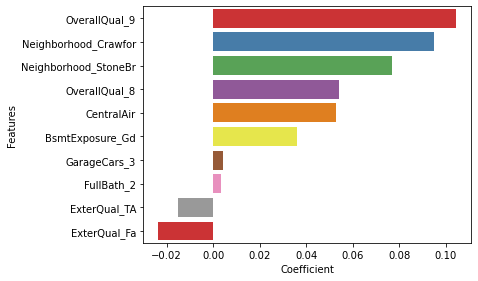

In [396]:
plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = temp2_df)
plt.show()

In [ ]:
## now have to take out 5 most important predictors

## overall qual_9/8, neighborhood crawfor/stonebr, central air all ove to be excluded